# AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [5]:
df_ice_cream = pd.read_csv("./data/ice_cream.csv")
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
# Rename columns to be more understandable
df_ice_cream.rename(columns={"DATE": "date", "IPN31152N":"production"}, inplace=True)

In [7]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream['date'])

In [9]:
df_ice_cream.set_index('date', inplace=True)

In [11]:
# Get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [12]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


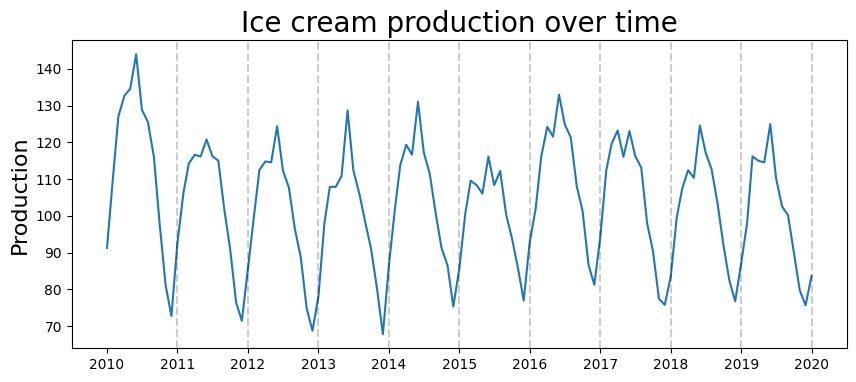

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df_ice_cream.production)
plt.title("Ice cream production over time", fontsize=20)
plt.ylabel("Production", fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='k', linestyle='--', alpha=0.2)

## ACF Plot

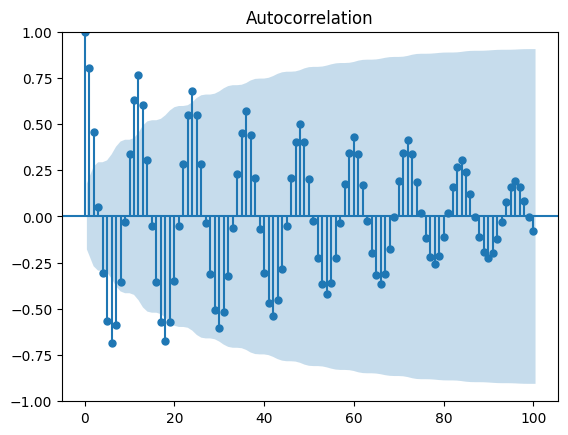

In [16]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

Based on decaying ACF, we're likely dealing with an Auto Regressive (AR) process

## PACF Plot

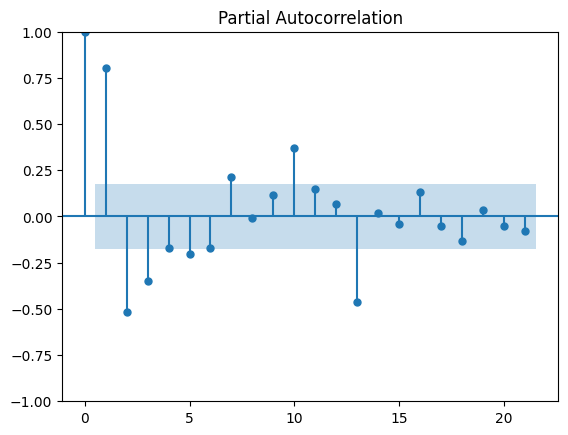

In [17]:
pacf_plot = plot_pacf(df_ice_cream.production)

Based on the PACF plot, we should start on an AR model with lags 1, 2, 3, 10, 13

# Stock data

In [18]:
import yfinance as yf

In [19]:
tickerSymbol = "SPY" 

In [20]:
tickerData = yf.Ticker(tickerSymbol)

In [21]:
tickerDf = tickerData.history(period='1d', start='2015-01-01', end='2020-01-01')

In [22]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,174.508194,174.930978,172.647936,173.704895,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,172.639493,172.808604,170.255000,170.567856,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,170.880779,171.413491,168.149599,168.961349,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,170.314187,171.413428,169.857587,171.066742,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,172.504188,174.322166,172.487286,174.102310,147217800,0.0,0.0,0.0


In [23]:
tickerDf = tickerDf[['Close']]

In [24]:
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,173.704895
2015-01-05 00:00:00-05:00,170.567856
2015-01-06 00:00:00-05:00,168.961349
2015-01-07 00:00:00-05:00,171.066742
2015-01-08 00:00:00-05:00,174.102310


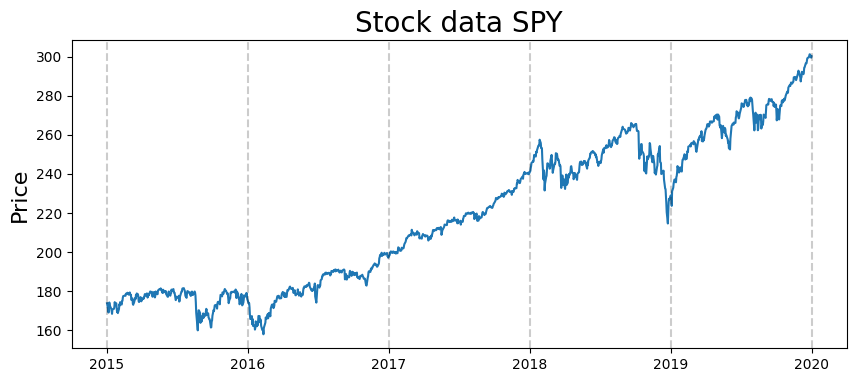

In [25]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title(f"Stock data {tickerSymbol}", fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='k', linestyle='--', alpha=0.2)

The data is not stationary, we can see that the mean increases overtime.
To make it stationary, we take the first difference (z_t = x_t - x_t-1)

In [26]:
firstDiffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
firstDiffs = np.concatenate([firstDiffs, [0]])

In [27]:
tickerDf["FirstDifference"] = firstDiffs

In [28]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,173.704895,-3.137039
2015-01-05 00:00:00-05:00,170.567856,-1.606506
2015-01-06 00:00:00-05:00,168.961349,2.105392
2015-01-07 00:00:00-05:00,171.066742,3.035568
2015-01-08 00:00:00-05:00,174.102310,-1.395126


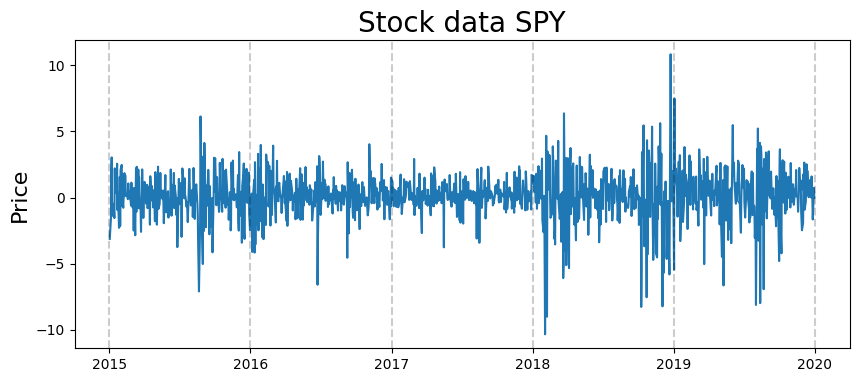

In [29]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title(f"Stock data {tickerSymbol}", fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='k', linestyle='--', alpha=0.2)

## ACF Plot

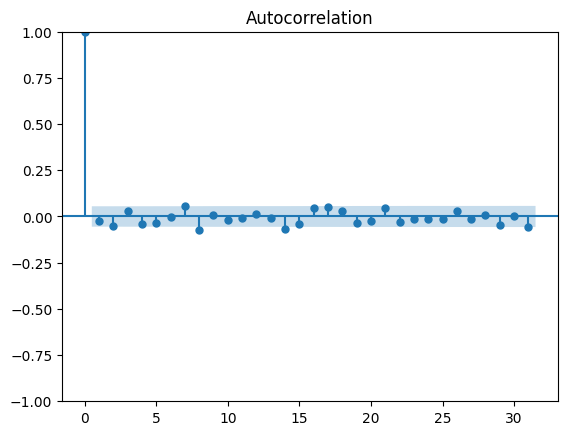

In [30]:
acf_plot = plot_acf(tickerDf.FirstDifference)

ACF plot shows us that there isn't really any correlation or effects that the lags have to future data points. Showing why it is hard to predict stock prices

## PACF Plot

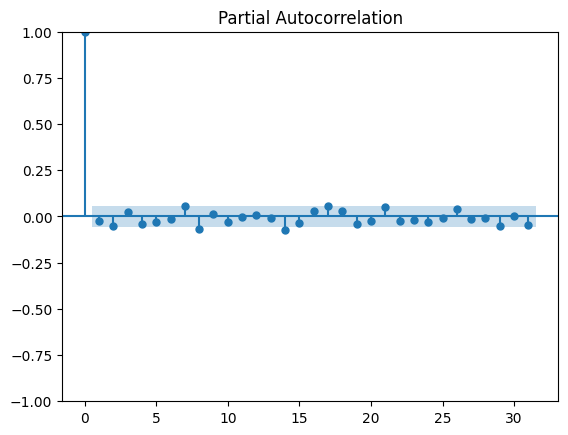

In [31]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

Similarly with PACF, there isn't much information to go off of